In [210]:
#import libraries
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



In [211]:
#Read file on DataFrame
df = pd.read_csv("Resources/cleaned_card_data.csv")
df.head()

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
0,57.88,0.31,1.95,1,1,0,0,0
1,10.83,0.18,1.29,1,0,0,0,0
2,5.09,0.81,0.43,1,0,0,1,0
3,2.25,5.60,0.36,1,1,0,1,0
4,44.19,0.57,2.22,1,1,0,1,0


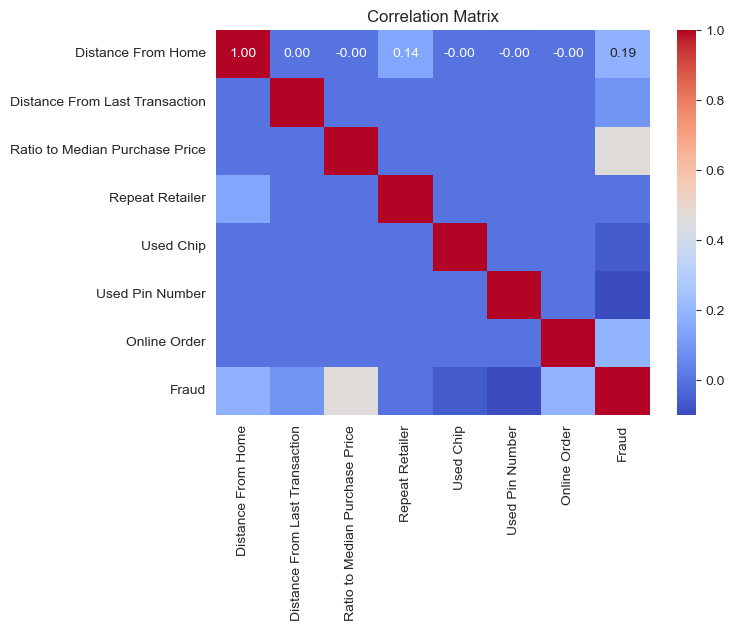

In [212]:
# Calculating the correlation matrix for the DataFrame 'df'
corr_matrix = df.corr()

# Creating a heatmap visualization of the correlation matrix
plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [213]:
test = df[['Repeat Retailer', 'Online Order']]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   Repeat Retailer  1000000 non-null  int64
 1   Online Order     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


In [214]:
#Analyze the correlation between repeat purchases from the same retailer and instances of fraudulent activity
df[['Repeat Retailer','Fraud']].corr()

,Repeat Retailer,Fraud
Repeat Retailer,1.000000,-0.001357
Fraud,-0.001357,1.000000


In [215]:
#Analyze the correlation between online orders and instances of fraudulent activity
df[['Online Order','Fraud']].corr()

,Online Order,Fraud
Online Order,1.000000,0.191973
Fraud,0.191973,1.000000


In [216]:
# Counting the occurrences of fraudulent and non-fraudulent transactions
fraud_counts = df['Fraud'].value_counts()

# Calculating the ratio of fradulant transactions as a percentage
fraud_ratio = fraud_counts[1] / fraud_counts[0] * 100

# Displaying the number of fraudulent transactions
print("Number of fraudulent transactions (FRAUD = 1):", fraud_counts[1])

# Displaying the number of non-fraudulent transactions
print("Number of non-fraudulent transactions (FRAUD = 0):", fraud_counts[0])

# Displaying the percentage of fraudulent transactions
print("\nPercentage of fraudulent transactions: {:.2f}%".format(fraud_ratio))



Number of fraudulent transactions (FRAUD = 1): 87403
Number of non-fraudulent transactions (FRAUD = 0): 912597

Percentage of fraudulent transactions: 9.58%


In [229]:
# Filtering the DataFrame to include only transactions from online orders
online_orders_df = df[df['Online Order'] == 1]
online_orders_df

# Counting the occurences of fraud in online orders
online_orders_df['Fraud'].value_counts()
online_orders_fraud = online_orders_df['Fraud'].value_counts()

# Calulating the ratio of fraudulent transactions in online orders
online_order_fraud_ratio = online_orders_fraud[1] / online_orders_fraud[0] * 100

# Displaying the number of fraudulent transactions
print("Number of fraudulent transactions (FRAUD = 1):", online_orders_fraud[1])

# Displaying the number of non-fraudulent transactions
print("Number of non-fraudulent transactions (FRAUD = 0):", online_orders_fraud[0])

# Printing the percentage of fraudulent transactions in online orders
print("\nPercentage of fraudulent transactions: {:.2f}%".format(online_order_fraud_ratio))


Number of fraudulent transactions (FRAUD = 1): 82711
Number of non-fraudulent transactions (FRAUD = 0): 567841

Percentage of fraudulent transactions: 14.57%


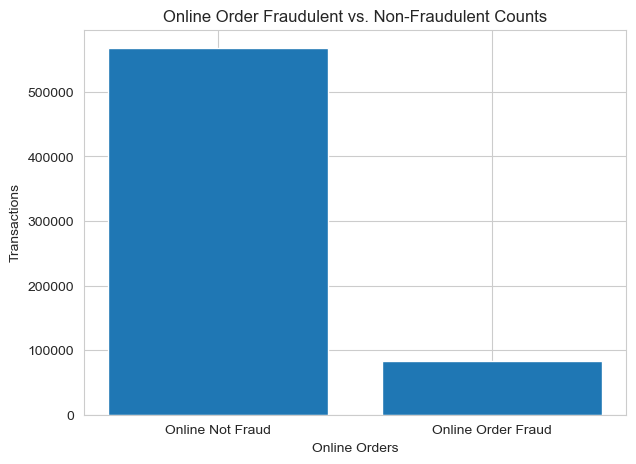

In [218]:
# Updating default plot parameters 
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Defining x-axis labels and corresponding data for the bar plot
x=['Online Not Fraud','Online Order Fraud']
y = online_orders_fraud
y

# Creating a bar plot to visualize fraudulent and non-fraudulent online orders
plt.bar(x,y)

# Adding labels and title to the plot
plt.xlabel('Online Orders')
plt.ylabel("Transactions")
plt.title('Online Order Fraudulent vs. Non-Fraudulent Counts')

# Displaying the plot
plt.show()

In [230]:
# Filtering the DataFrame to include only transactions from online orders
repeated_retailer_df = df[df['Repeat Retailer'] == 1]
repeated_retailer_df

# Counting the occurences of fraud in repeat retailer
repeated_retailer_df['Fraud'].value_counts()
repeated_retailer_fraud = repeated_retailer_df['Fraud'].value_counts()

# Calulating the ratio of fraudulent transactions in online orders
repeated_retailer_fraud_ratio = repeated_retailer_fraud[1] / repeated_retailer_fraud[0] * 100

# Displaying the number of fraudulent transactions
print("Number of fraudulent transactions (FRAUD = 1):", repeated_retailer_fraud[1])

# Displaying the number of non-fraudulent transactions
print("Number of non-fraudulent transactions (FRAUD = 0):", repeated_retailer_fraud[0])

# Printing the percentage of fraudulent transactions in online orders
print("\nPercentage of fraudulent transactions: {:.2f}%".format(repeated_retailer_fraud_ratio))


Number of fraudulent transactions (FRAUD = 1): 76925
Number of non-fraudulent transactions (FRAUD = 0): 804611

Percentage of fraudulent transactions: 9.56%


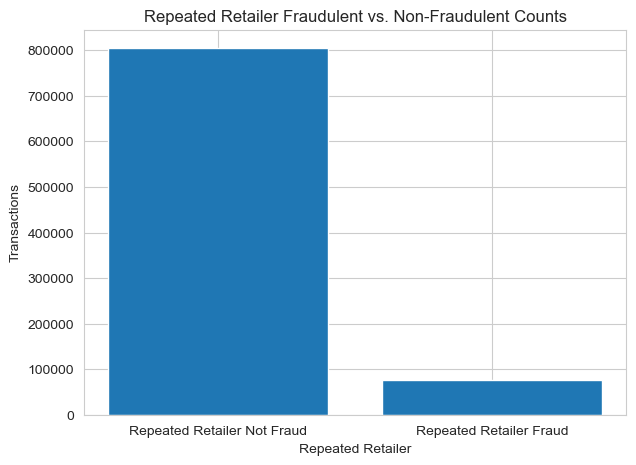

In [220]:
# Updating default plot parameters 
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Defining x-axis labels and corresponding data for the bar plot
x=['Repeated Retailer Not Fraud','Repeated Retailer Fraud']
y = repeated_retailer_fraud
y

#Creating a bar plot to visualize fraudulent and non-fraudulent online orders
plt.bar(x,y)

# Adding labels and title to the plot
plt.xlabel('Repeated Retailer')
plt.ylabel("Transactions")
plt.title('Repeated Retailer Fraudulent vs. Non-Fraudulent Counts')

# Displaying the plot
plt.show()

Conclusion

Question

Is there a higher likelihood of a fraudulent transaction occurring via an online order or through a repeated retailer?

In summary, the data suggest a slightly higher occurence of fraudulent transactions through online orders compared to those from repeat retailers. The moderate positive correlation with online orders indicates a greater likelihood of encountering fraudulent activity in this context. 

